<a href="https://colab.research.google.com/github/topguns837/MNIST_digit_recognizer/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Before Learning CNN :)

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/topguns837/digit_recognizer/master/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/topguns837/digit_recognizer/master/test.csv')

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# The input image is 28*28

In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape


(42000, 785)

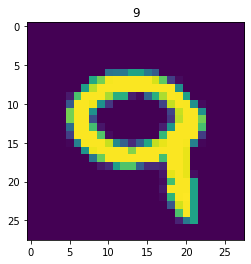

In [ ]:
# I will need to reshape the X data to be able to use plt.imshow()

# Get a random image 
import random
index = random.randint(0,4200)

# Get a sample using the random index
sample = train_data.iloc[index,1:]

# Reshaping the matrix from (None,784) to (28,28)
sample = np.array(sample)
sample = np.reshape(sample , (28,28))

# Visualization using matplotlib
plt.imshow(sample)
plt.title(train_data["label"][index])
plt.show()


In [ ]:
train_data.iloc[0,:].shape

# Since the input matrix is already 1D, we wont need a flatten layer this time :)
  

(785,)

In [ ]:
train_data.iloc[0,:].value_counts()

0      687
253     24
254      6
94       3
93       3
7        2
80       2
89       2
20       2
13       2
209      2
248      2
250      2
191      2
240      2
188      2
22       1
168      1
198      1
196      1
203      1
76       1
1        1
25       1
245      1
103      1
195      1
15       1
220      1
251      1
131      1
214      1
218      1
206      1
23       1
27       1
235      1
255      1
123      1
167      1
10       1
247      1
208      1
29       1
207      1
77       1
81       1
54       1
88       1
238      1
170      1
17       1
210      1
159      1
16       1
95       1
Name: 0, dtype: int64

In [ ]:
tf.argmax(train_data.iloc[0,:]) , tf.argmin(train_data.iloc[0,:])

(<tf.Tensor: shape=(), dtype=int64, numpy=134>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>)

In [ ]:
# Splitting data into X and y
X = train_data.drop(["label"],axis = 1)
y = train_data["label"]

# Splitting data into test and train sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) 



In [ ]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,250,204,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

11398    7
27404    1
2214     5
13182    5
41591    5
        ..
23973    6
13503    7
40349    4
653      8
18876    7
Name: label, Length: 33600, dtype: int64

In [ ]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41758,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

22056    6
30357    0
10748    1
3250     0
37022    7
        ..
24615    2
26557    6
10849    2
41758    5
10500    6
Name: label, Length: 8400, dtype: int64

In [ ]:
# We need to normalize both train and test data

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
np.max(X_train.iloc[0,:]) , np.max(X_test.iloc[0,:])

(1.0, 1.0)

In [ ]:
np.min(X_train.iloc[0,:]) , np.min(X_test.iloc[0,:])

(0.0, 0.0)

In [ ]:
# Both test and train data has been normalized

In [ ]:
# Let's train our model now :)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
                             
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")
])

#2. Compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

#3. fit the model
history = model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
1050/1050 [==============================] - 3s 2ms/step - loss: 1.2331 - accuracy: 0.5821
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.7691 - accuracy: 0.7438
Epoch 3/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.7740
Epoch 4/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6553 - accuracy: 0.7904
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6306 - accuracy: 0.8043
Epoch 6/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6114 - accuracy: 0.8113
Epoch 7/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5967 - accuracy: 0.8156
Epoch 8/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5833 - accuracy: 0.8212
Epoch 9/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5742 - accuracy: 0.8240
Epoch 10/100
1050/1050 [==============================] - 2s 2ms/step - l

In [ ]:
# Evaluate our model on test_data
model.evaluate(X_test,y_test)

263/263 [==============================] - 1s 1ms/step - loss: 0.5219 - accuracy: 0.8526


[0.5218637585639954, 0.8526190519332886]

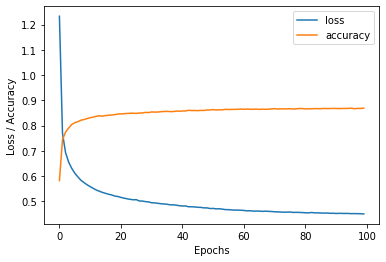

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.show()

In [ ]:
# Make the first prediction on validation data, you can make the model better later :)

In [ ]:
validation_data  = test_data

validation_data = validation_data/255.0

np.max(validation_data.iloc[0,:]) , np.min(validation_data.iloc[0,:])

(1.0, 0.0)

In [ ]:
validation_probs = model.predict(validation_data)

In [ ]:
validation_probs.shape

(28000, 10)

In [ ]:
# Converting the probability values to integers
validation_preds = validation_probs.argmax(axis = 1)

In [ ]:
validation_preds.shape

(28000,)

In [ ]:
validation_preds = pd.DataFrame(validation_preds)
validation_preds

,0
0,2
1,0
2,4
3,7
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [ ]:
validation_preds.columns = ["Labels"]

In [ ]:
indexes = np.arange(1,28001)
indexes

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [ ]:
validation_preds.to_csv('preds1.csv',index = False)

In [ ]:
validation_preds["ImageId"] = indexes
#validation_preds.drop(["ImageId\t"],inplace = True, axis = 1)

KeyError: ignored

In [ ]:
validation_preds.columns = ["Label","ImageId"]
validation_preds

,Label,ImageId
0,2,1
1,0,2
2,4,3
3,7,4
4,3,5
...,...,...
27995,9,27996
27996,7,27997
27997,3,27998
27998,9,27999


In [ ]:
validation_preds = validation_preds.reindex(columns=["ImageId","Label"])
validation_preds

,ImageId,Label
0,1,2
1,2,0
2,3,4
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
validation_preds.to_csv('preds1.csv',index = False)

In [ ]:
# Let's save our primary model 
model.save("model")

INFO:tensorflow:Assets written to: model/assets


## Parameters to change
### 1) Epochs
### 2) Optimzer
### 3) Loss
### 4) Layers
### 5) Learning Rate
### 6) Activation Functions

In [ ]:
# Changing the optimzer function

# Set random seed
tf.random.set_seed(42)

#1. Create a model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = "relu"),
                               tf.keras.layers.Dense(4,activation = "relu"),
                               tf.keras.layers.Dense(10,activation = "softmax")

])

#2. Compile the model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

#3. Fit the model
history_1 = model_1.fit(X_train,y_train,epochs = 100)

Epoch 1/100
1050/1050 [==============================] - 3s 2ms/step - loss: 1.6682 - accuracy: 0.4271
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.9617 - accuracy: 0.6822
Epoch 3/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.7768 - accuracy: 0.7443
Epoch 4/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.7195 - accuracy: 0.7675
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6866 - accuracy: 0.7800
Epoch 6/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6665 - accuracy: 0.7879
Epoch 7/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6506 - accuracy: 0.7948
Epoch 8/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6359 - accuracy: 0.7994
Epoch 9/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6243 - accuracy: 0.8059
Epoch 10/100
1050/1050 [==============================] - 2s 2ms/step - l

In [ ]:
model_1.evaluate(X_test,y_test)

263/263 [==============================] - 1s 3ms/step - loss: 0.5267 - accuracy: 0.8452


[0.5267365574836731, 0.8452380895614624]

### After learning CNN :)

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(42000, 785)

In [ ]:
28*28

784

In [ ]:
test_data.shape

(28000, 784)

In [ ]:
np.max(train_data.max())

## We need to normalizee pixel intensities

255

In [ ]:
X_df = train_data.drop(['label'] , axis = 1)
y_df = train_data['label']

In [ ]:
len(X_df) , len(y_df)

(42000, 42000)

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_df , y_df , test_size = 0.2 ,random_state = 100)

In [ ]:
len(X_train) , len(y_train)

(33600, 33600)

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

#X_train = np.array(X_train).reshape(42000,784,1)

In [ ]:
#X_test = np.array(X_test).reshape(42000,28,28,1)

In [ ]:
# Converting into tensors

X_train , X_test  = tf.constant(X_train , dtype = tf.float64) , tf.constant(X_test , dtype = tf.float64)
y_train , y_test =  tf.constant(y_train , dtype = tf.float64) , tf.constant(y_test , dtype = tf.float64)

In [ ]:
len(X_train) , len(y_train)

(33600, 33600)

In [ ]:
tf.argmax(X_train , axis = 1)

<tf.Tensor: shape=(33600, 28, 1), dtype=int64, numpy=
array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])>

In [ ]:
# Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
tf.argmax(X_train , axis = 1) ## Wrong function used...argmax gives us the indices of the largest value

<tf.Tensor: shape=(33600, 28, 1), dtype=int64, numpy=
array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])>

In [ ]:
tf.reduce_max(X_train)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [ ]:
X_train.ndim

4

### Model Fitting

In [ ]:
# set random seed

tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
                             tf.keras.Input(shape = ( 28 , 28 ,  1)) ,
                             

                             tf.keras.layers.Conv2D(32 , (3,3) ,activation = 'relu' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(64 , (3,3) ,activation = 'relu' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(64 , (3,3) ,activation = 'relu' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(64 , (3,3) ,activation = 'tanh' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(32 , (3,3) ,activation = 'sigmoid' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10 , activation = 'softmax')


])



#2. Compile the model

model.compile(loss = 'sparse_categorical_crossentropy' ,
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

#3. Learning rate callback

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * (10)**(epoch/20))

#4. Fit the model

history = model.fit(X_train,y_train, epochs=50 ,callbacks = [lr_schedular] , 
                    validation_data = (X_test , y_test))

Epoch 1/50
1050/1050 [==============================] - 67s 62ms/step - loss: 1.4691 - accuracy: 0.6716 - val_loss: 0.8410 - val_accuracy: 0.8905 - lr: 1.0000e-04
Epoch 2/50
1050/1050 [==============================] - 63s 60ms/step - loss: 0.5862 - accuracy: 0.9272 - val_loss: 0.4230 - val_accuracy: 0.9448 - lr: 1.1220e-04
Epoch 3/50
1050/1050 [==============================] - 63s 60ms/step - loss: 0.3149 - accuracy: 0.9546 - val_loss: 0.2520 - val_accuracy: 0.9571 - lr: 1.2589e-04
Epoch 4/50
1050/1050 [==============================] - 61s 58ms/step - loss: 0.2015 - accuracy: 0.9647 - val_loss: 0.1820 - val_accuracy: 0.9637 - lr: 1.4125e-04
Epoch 5/50
1050/1050 [==============================] - 61s 59ms/step - loss: 0.1421 - accuracy: 0.9718 - val_loss: 0.1240 - val_accuracy: 0.9738 - lr: 1.5849e-04
Epoch 6/50
1050/1050 [==============================] - 61s 58ms/step - loss: 0.1095 - accuracy: 0.9757 - val_loss: 0.1136 - val_accuracy: 0.9732 - lr: 1.7783e-04
Epoch 7/50
1050/1050 [

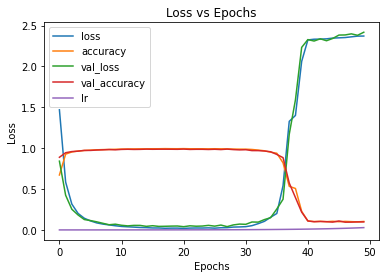

In [ ]:
# Plot loss vs epochs graph

pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

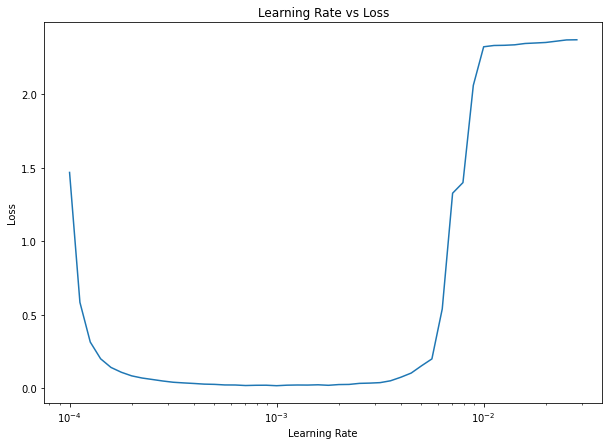

In [ ]:
lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()


In [ ]:
# set random seed

tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
                             tf.keras.Input(shape = ( 28 , 28 ,  1)) ,
                             

                             tf.keras.layers.Conv2D(32 , (3,3) ,activation = 'relu' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(64 , (3,3) ,activation = 'relu' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(64 , (3,3) ,activation = 'relu' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(64 , (3,3) ,activation = 'tanh' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Conv2D(32 , (3,3) ,activation = 'sigmoid' , padding = 'same') ,
                             tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10 , activation = 'softmax')


])



#2. Compile the model

model.compile(loss = 'sparse_categorical_crossentropy' ,
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

#3. Fit the model

history = model.fit(X_train,y_train, epochs=25 , 
                    validation_data = (X_test , y_test))

Epoch 1/25
1050/1050 [==============================] - 13s 11ms/step - loss: 0.5035 - accuracy: 0.8849 - val_loss: 0.1301 - val_accuracy: 0.9686
Epoch 2/25
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0873 - accuracy: 0.9784 - val_loss: 0.0776 - val_accuracy: 0.9792
Epoch 3/25
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0519 - accuracy: 0.9865 - val_loss: 0.0667 - val_accuracy: 0.9812
Epoch 4/25
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.0695 - val_accuracy: 0.9801
Epoch 5/25
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0296 - accuracy: 0.9918 - val_loss: 0.0430 - val_accuracy: 0.9874
Epoch 6/25
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.0453 - val_accuracy: 0.9863
Epoch 7/25
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0414 - val_

In [ ]:
model.save('MNIST_cnn.h5')

In [ ]:
 loaded_model  = tf.keras.models.load_model('MNIST_cnn.h5')

In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)        